#### LinkedIn: [Ailton Amorim de Menezes](https://www.linkedin.com/in/ailton-amorim-de-menezes-1228a0282/)
#### Kaggle: [Ailton Amorim de Menezes](https://www.kaggle.com/aiamenez/)
#### GitHub: [Ailton Amorim de Menezes](https://github.com/AiltonMenezes1980/)

In [1]:
from platform import python_version
print(f"Vers√£o do Python Usada Neste Notebook: {python_version()}")

Vers√£o do Python Usada Neste Notebook: 3.11.4


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
import sqlite3
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
%reload_ext watermark
%watermark -a "Ailton Amorim de Menezes" --iversions

Author: Ailton Amorim de Menezes

pandas    : 2.0.3
numpy     : 1.25.1
matplotlib: 3.7.2
seaborn   : 0.12.2
sqlite3   : 2.6.0



In [4]:
cnn = sqlite3.connect("database/prouni.db")

In [5]:
query = "SELECT * FROM prouni"
prouni = pd.read_sql(query, cnn)

In [6]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES      TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL  BOLSA INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        Presencial              Letras - Espanhol            Noturno   
1        Presencial  Letras - Portugu√™s E Espanhol            Noturno   
2        Presencial                     Psicologia         Vespertino   
3        Presencial                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            Nordeste              PE   
1                              N            Nordeste              PE   
2                              N            Nordeste              PE   
3                              N            Nordeste              PE   
4                              N                 Sul              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

In [7]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648894 entries, 0 to 648893
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   index                           648894 non-null  int64 
 1   ANO_CONCESSAO                   648894 non-null  object
 2   NOME_IES                        648894 non-null  object
 3   TIPO_BOLSA                      648894 non-null  object
 4   MODALIDADE_ENSINO               648894 non-null  object
 5   NOME_CURSO                      648894 non-null  object
 6   NOME_TURNO_CURSO                648894 non-null  object
 7   SEXO_BENEFICIARIO               648894 non-null  object
 8   RACA_BENEFICIARIO               648894 non-null  object
 9   DATA_NASCIMENTO                 648894 non-null  object
 10  BENEFICIARIO_DEFICIENTE_FISICO  648894 non-null  object
 11  REGIAO_BENEFICIARIO             648894 non-null  object
 12  UF_BENEFICIARIO               

In [8]:
prouni.isna()

index  ANO_CONCESSAO  NOME_IES  TIPO_BOLSA  MODALIDADE_ENSINO  \
0       False          False     False       False              False   
1       False          False     False       False              False   
2       False          False     False       False              False   
3       False          False     False       False              False   
4       False          False     False       False              False   
...       ...            ...       ...         ...                ...   
648889  False          False     False       False              False   
648890  False          False     False       False              False   
648891  False          False     False       False              False   
648892  False          False     False       False              False   
648893  False          False     False       False              False   

        NOME_CURSO  NOME_TURNO_CURSO  SEXO_BENEFICIARIO  RACA_BENEFICIARIO  \
0            False             False              False              False   
1            False             False              False              False   
2            False             False              False              False   
3            False             False              False              False   
4            False             False              False              False   
...            ...               ...                ...                ...   
648889       False             False              False              False   
648890       False             False              False              False   
648891       False             False              False              False   
648892       False             False              False              False   
648893       False             False              False              False   

        DATA_NASCIMENTO  BENEFICIARIO_DEFICIENTE_FISICO  REGIAO_BENEFICIARIO  \
0                 False                           False                False   
1                 False                           False                False   
2                 False                           False                False   
3                 False                           False                False   
4                 False                           False                False   
...                 ...                             ...                  ...   
648889            False                           False                False   
648890            False                           False                False   
648891            False                           False                False   
648892            False                           False                False   
648893            False                           False                False   

        UF_BENEFICIARIO  MUNICIPIO_BENEFICIARIO  
0                 False                   False  
1                 False                   False  
2                 False                   False  
3                 False                   False  
4                 False                   False  
...                 ...                     ...  
648889            False                   False  
648890            False                   False  
648891            False                   False  
648892            False                   False  
648893            False                   False  

[648894 rows x 14 columns]

In [9]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES      TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL  BOLSA INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        Presencial              Letras - Espanhol            Noturno   
1        Presencial  Letras - Portugu√™s E Espanhol            Noturno   
2        Presencial                     Psicologia         Vespertino   
3        Presencial                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            Nordeste              PE   
1                              N            Nordeste              PE   
2                              N            Nordeste              PE   
3                              N            Nordeste              PE   
4                              N                 Sul              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

In [10]:
unique_values = prouni['ANO_CONCESSAO'].unique()
print(unique_values)

['2018.0' '2019.0' 'Outro' '2020.0']


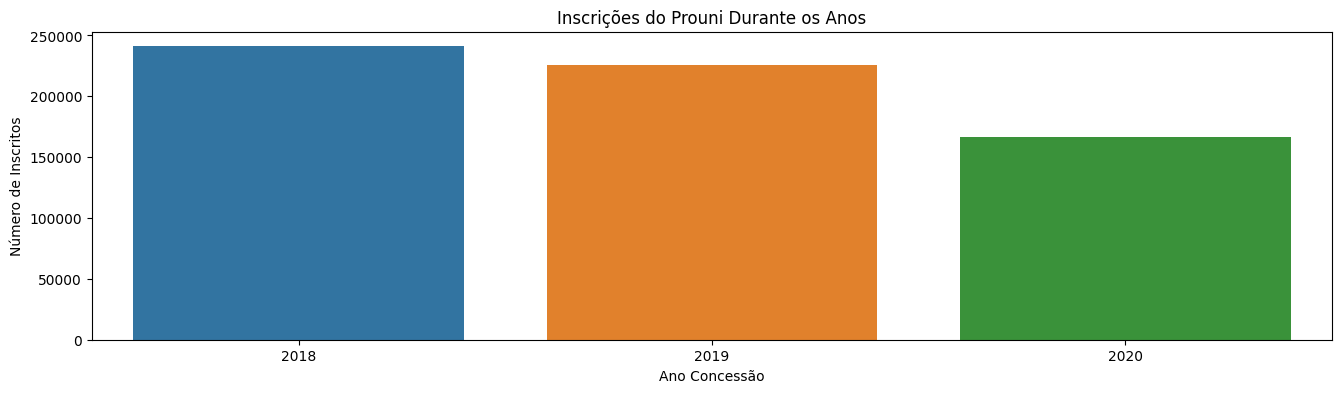

In [11]:
df_prouni_filtrado = prouni[prouni['ANO_CONCESSAO'] != 'Outro']
df_prouni_filtrado['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)

plt.figure(figsize = (16, 4))
sns.countplot(x='ANO_CONCESSAO', data=df_prouni_filtrado)
plt.title("Inscri√ß√µes do Prouni Durante os Anos")
plt.xlabel("Ano Concess√£o")
plt.ylabel("N√∫mero de Inscritos")
plt.show()

In [12]:
print(prouni['RACA_BENEFICIARIO'].value_counts())

RACA_BENEFICIARIO
Parda            295920
Branca           244113
Preta             81848
Outro             15477
Amarela           10882
Ind√≠gena            401
Ind¬°gena            153
N√£o Informada       100
Name: count, dtype: int64


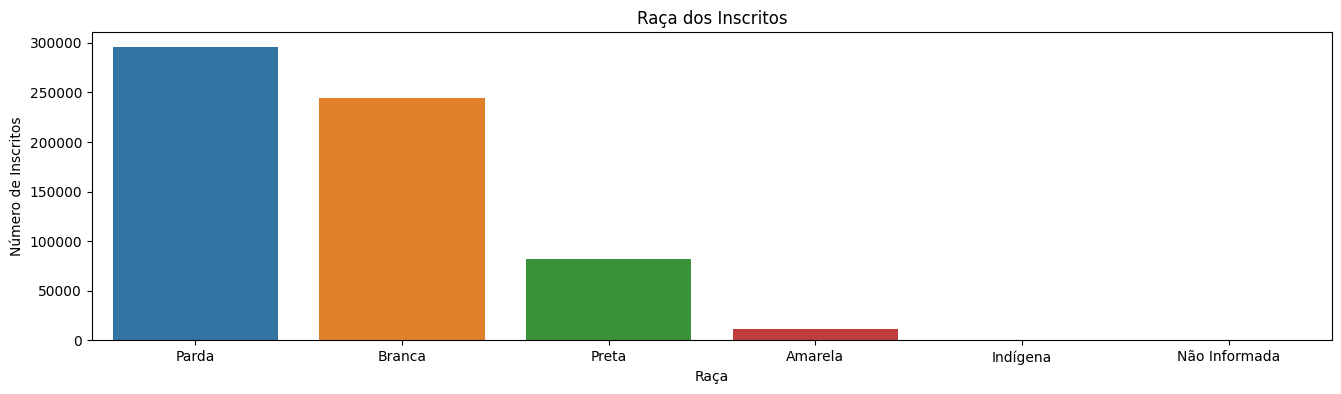

In [13]:
prouni['RACA_BENEFICIARIO'] = prouni['RACA_BENEFICIARIO'].replace('Ind¬°gena', 'Ind√≠gena')
df_prouni_filtrado = prouni[prouni['RACA_BENEFICIARIO'] != 'Outro']

plt.figure(figsize = (16, 4))
sns.countplot(x = "RACA_BENEFICIARIO", data = df_prouni_filtrado)
plt.title("Ra√ßa dos Inscritos")
plt.xlabel("Ra√ßa")
plt.ylabel("N√∫mero de Inscritos")
plt.show()

In [14]:
contingency_table = pd.crosstab(prouni['ANO_CONCESSAO'], prouni['RACA_BENEFICIARIO'])

print(contingency_table)

RACA_BENEFICIARIO  Amarela  Branca  Ind√≠gena  N√£o Informada  Outro   Parda  \
ANO_CONCESSAO                                                                
2018.0                4165   93254       204             22      0  112148   
2019.0                3817   86375       197              5      0  105705   
2020.0                2900   64484       153             73      0   78067   
Outro                    0       0         0              0  15477       0   

RACA_BENEFICIARIO  Preta  
ANO_CONCESSAO             
2018.0             31239  
2019.0             29456  
2020.0             21153  
Outro                  0  


In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'valor-p: {p}')

valor-p: 0.0


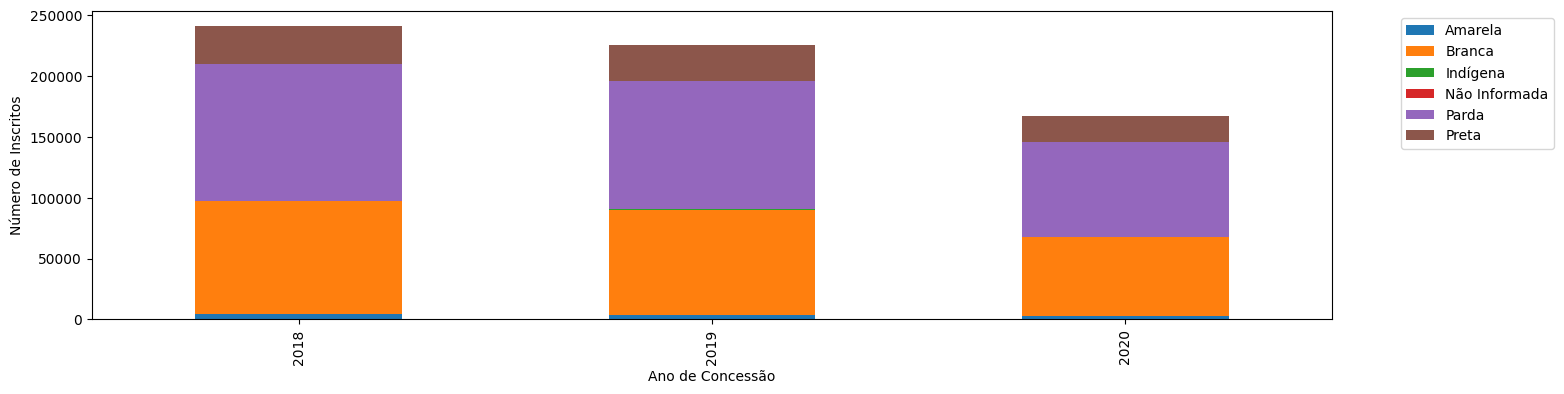

In [16]:
df_prouni_filtrado = prouni.loc[prouni['ANO_CONCESSAO'] != 'Outro']

df_prouni_filtrado['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)

contingency_table = pd.crosstab(df_prouni_filtrado['ANO_CONCESSAO'], df_prouni_filtrado['RACA_BENEFICIARIO'])

ax = contingency_table.plot(kind='bar', stacked=True, figsize=(16, 4))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Ano de Concess√£o')
plt.ylabel('N√∫mero de Inscritos')

plt.show()

Durante o per√≠odo de an√°lise entre 2018 e 2020, observou-se uma diminui√ß√£o significativa no n√∫mero de inscritos no Programa Universidade para Todos (ProUni). Embora as causas espec√≠ficas dessa diminui√ß√£o n√£o tenham sido encontradas nos dados e nas informa√ß√µes dispon√≠veis, √© poss√≠vel considerar algumas justificativas plaus√≠veis para essa redu√ß√£o, levando em conta o contexto socioecon√¥mico e educacional do pa√≠s.

1. Condi√ß√µes econ√¥micas desfavor√°veis: √â amplamente reconhecido que o cen√°rio econ√¥mico de um pa√≠s pode influenciar diretamente a capacidade dos estudantes de acessarem o ensino superior. Durante o per√≠odo analisado, pode ter havido uma conjuntura de recess√£o econ√¥mica ou instabilidade financeira, o que poderia ter impactado negativamente o interesse e a possibilidade de muitos estudantes de baixa renda se candidatarem ao ProUni. Dessa forma, a falta de recursos financeiros para arcar com despesas complementares ou a necessidade de buscar outras formas de renda podem ter contribu√≠do para a diminui√ß√£o no n√∫mero de inscritos.

2. Mudan√ßas nas regras e crit√©rios de elegibilidade: √â importante considerar que o ProUni pode ter passado por altera√ß√µes nas regras e crit√©rios de elegibilidade durante o per√≠odo analisado. Mudan√ßas nesses aspectos podem ter influenciado a percep√ß√£o dos estudantes em rela√ß√£o ao programa, levando a uma diminui√ß√£o no interesse e na participa√ß√£o. Por exemplo, se houve uma redu√ß√£o nos benef√≠cios oferecidos ou uma restri√ß√£o nos crit√©rios de elegibilidade, isso poderia ter desestimulado alguns estudantes a se inscreverem.

3. Consci√™ncia limitada sobre o programa: A falta de conscientiza√ß√£o e divulga√ß√£o adequadas sobre o ProUni pode ter sido um fator relevante para a diminui√ß√£o no n√∫mero de inscritos durante o per√≠odo analisado. Se os estudantes eleg√≠veis n√£o foram adequadamente informados sobre o programa, seus benef√≠cios e como se inscrever, √© prov√°vel que muitos n√£o tenham buscado essa oportunidade. Portanto, a falta de divulga√ß√£o eficiente do ProUni pode ter contribu√≠do para a redu√ß√£o do n√∫mero de inscritos.

Essas justificativas destacam poss√≠veis fatores que podem ter influenciado a diminui√ß√£o no n√∫mero de inscritos no ProUni entre 2018 e 2020, embora as causas espec√≠ficas n√£o tenham sido encontradas nos dados dispon√≠veis. √â importante ressaltar que uma an√°lise mais aprofundada, com base em dados atualizados e estudos espec√≠ficos, poderia fornecer insights mais precisos sobre as raz√µes para essa redu√ß√£o.

In [17]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES      TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO  BOLSA INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL  BOLSA INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        Presencial              Letras - Espanhol            Noturno   
1        Presencial  Letras - Portugu√™s E Espanhol            Noturno   
2        Presencial                     Psicologia         Vespertino   
3        Presencial                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            Nordeste              PE   
1                              N            Nordeste              PE   
2                              N            Nordeste              PE   
3                              N            Nordeste              PE   
4                              N                 Sul              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

In [18]:
prouni["TIPO_BOLSA"].value_counts()

TIPO_BOLSA
BOLSA INTEGRAL       329378
BOLSA PARCIAL 50%    137209
INTEGRAL             130744
PARCIAL               36086
Outro                 15477
Name: count, dtype: int64

In [19]:
prouni['TIPO_BOLSA'] = prouni['TIPO_BOLSA'].replace({'BOLSA INTEGRAL': 'INTEGRAL', 'BOLSA PARCIAL 50%': 'PARCIAL'})

In [20]:
prouni["TIPO_BOLSA"].value_counts()

TIPO_BOLSA
INTEGRAL    460122
PARCIAL     173295
Outro        15477
Name: count, dtype: int64

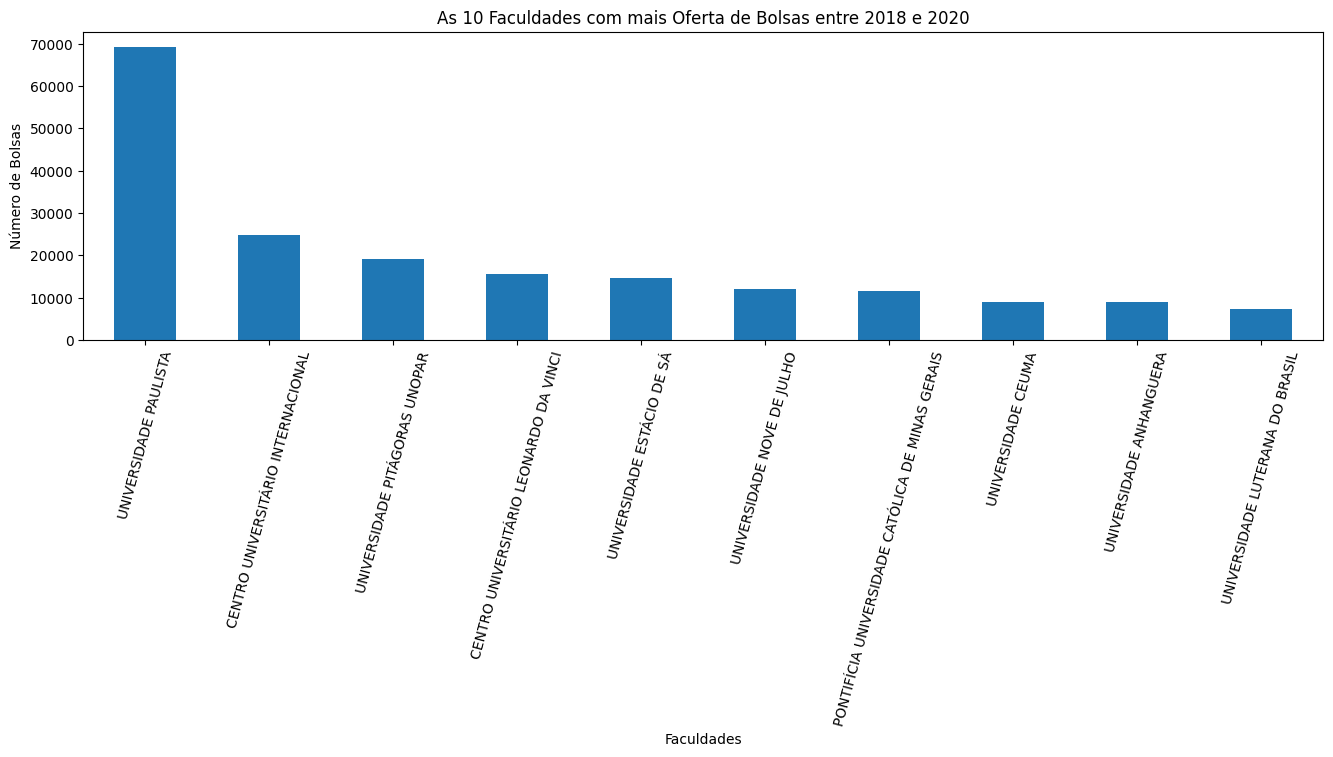

In [21]:
df_prouni_filtrado['NOME_IES'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("As 10 Faculdades com mais Oferta de Bolsas entre 2018 e 2020")
plt.xlabel("Faculdades")
plt.ylabel("N√∫mero de Bolsas")
plt.xticks(rotation=75)
plt.show()

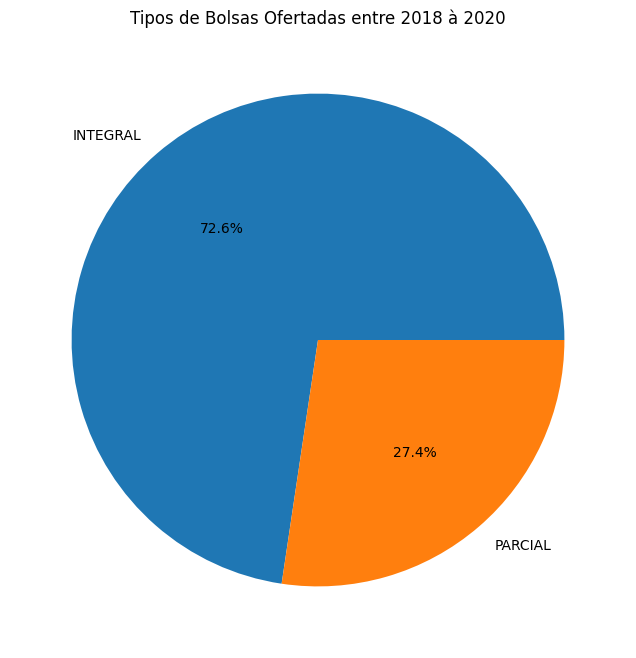

In [22]:
prouni_filtered = prouni[prouni['TIPO_BOLSA'] != 'Outro']
data = prouni_filtered['TIPO_BOLSA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Tipos de Bolsas Ofertadas entre 2018 √† 2020")
plt.show()

In [23]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL   INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        Presencial              Letras - Espanhol            Noturno   
1        Presencial  Letras - Portugu√™s E Espanhol            Noturno   
2        Presencial                     Psicologia         Vespertino   
3        Presencial                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            Nordeste              PE   
1                              N            Nordeste              PE   
2                              N            Nordeste              PE   
3                              N            Nordeste              PE   
4                              N                 Sul              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

In [24]:
prouni["MODALIDADE_ENSINO"].value_counts()

MODALIDADE_ENSINO
Presencial    342007
EAD           178405
PRESENCIAL    113005
Outro          15477
Name: count, dtype: int64

In [25]:
prouni['MODALIDADE_ENSINO'] = prouni['MODALIDADE_ENSINO'].replace({'Presencial': 'PRESENCIAL'})

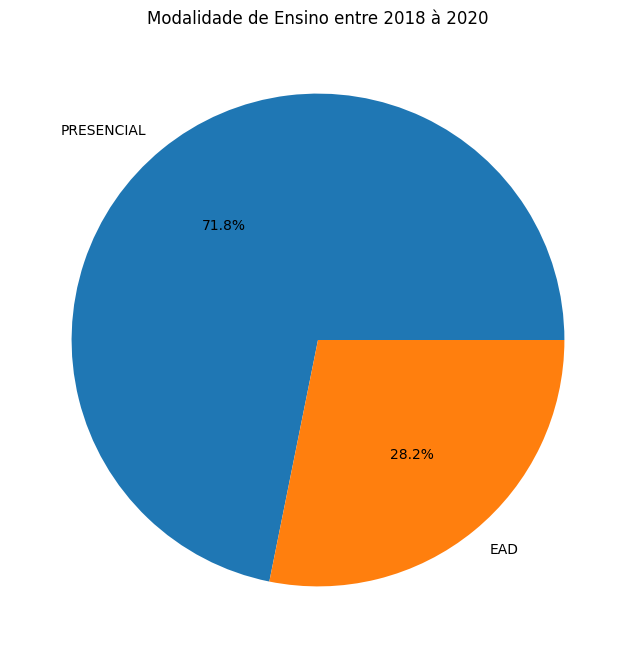

In [26]:
prouni_filtered = prouni[prouni['MODALIDADE_ENSINO'] != 'Outro']
data = prouni_filtered['MODALIDADE_ENSINO'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Modalidade de Ensino entre 2018 √† 2020")
plt.show()

In [27]:
prouni["REGIAO_BENEFICIARIO"].value_counts()

REGIAO_BENEFICIARIO
Sudeste         208108
Nordeste        101708
Sul              77846
SUDESTE          71644
Centro-Oeste     41295
NORDESTE         39252
Norte            37630
SUL              26376
NORTE            16303
Outro            15477
CENTRO-OESTE     13255
Name: count, dtype: int64

In [28]:
prouni['REGIAO_BENEFICIARIO'] = prouni['REGIAO_BENEFICIARIO'].replace({'Sudeste': 'SUDESTE', 'Nordeste': 'NORDESTE', 'Sul': 'SUL',
                                                                      'Centro-Oeste': 'CENTRO-OESTE', 'Norte': 'NORTE'})

In [29]:
prouni["REGIAO_BENEFICIARIO"].value_counts()

REGIAO_BENEFICIARIO
SUDESTE         279752
NORDESTE        140960
SUL             104222
CENTRO-OESTE     54550
NORTE            53933
Outro            15477
Name: count, dtype: int64

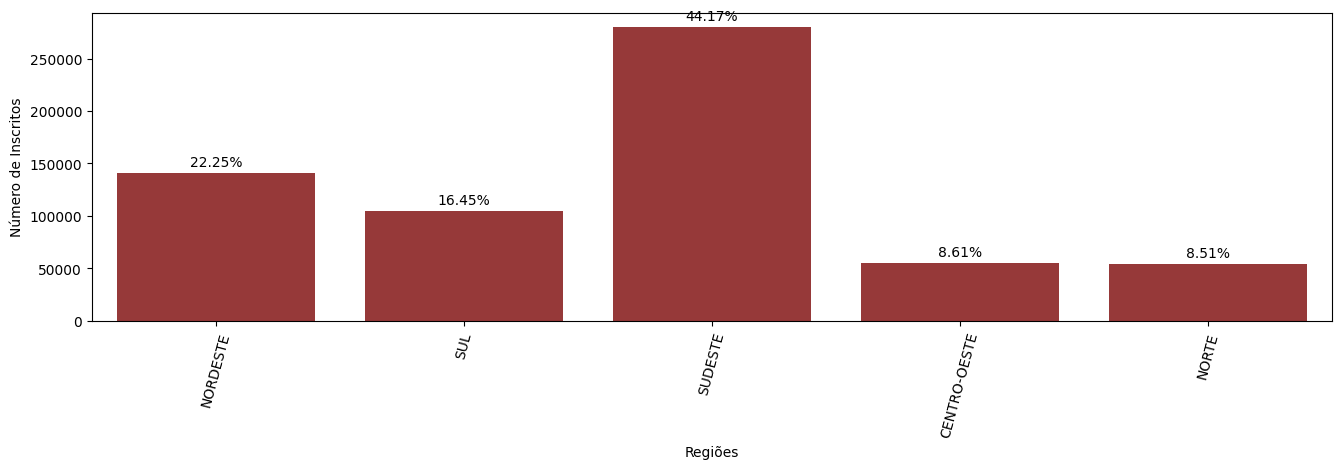

In [30]:
prouni_filtered = prouni[prouni['MODALIDADE_ENSINO'] != 'Outro']
plt.figure(figsize=(16, 4))
sns.countplot(x='REGIAO_BENEFICIARIO', data=prouni_filtered, color='brown')
plt.xlabel('Regi√µes')
plt.ylabel('N√∫mero de Inscritos')
plt.xticks(rotation=75)

# Obt√©m o total de inscritos
total_inscritos = len(prouni_filtered)

# Percorre cada barra do gr√°fico
for barra in plt.gca().patches:
    # Obt√©m a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em rela√ß√£o ao total
    porcentagem = altura / total_inscritos * 100

    # Ajusta a posi√ß√£o da anota√ß√£o se a altura da barra for pequena
    if altura < 30:
        plt.gca().annotate(f'{porcentagem:.2f}%', 
                           xy=(barra.get_x() + barra.get_width() / 2, altura),
                           xytext=(0, 10),
                           textcoords="offset points",
                           ha='center',
                           va='bottom')
    else:
        plt.gca().annotate(f'{porcentagem:.2f}%', 
                           xy=(barra.get_x() + barra.get_width() / 2, altura),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center',
                           va='bottom')

plt.show()

In [31]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL   INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        PRESENCIAL              Letras - Espanhol            Noturno   
1        PRESENCIAL  Letras - Portugu√™s E Espanhol            Noturno   
2        PRESENCIAL                     Psicologia         Vespertino   
3        PRESENCIAL                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            NORDESTE              PE   
1                              N            NORDESTE              PE   
2                              N            NORDESTE              PE   
3                              N            NORDESTE              PE   
4                              N                 SUL              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

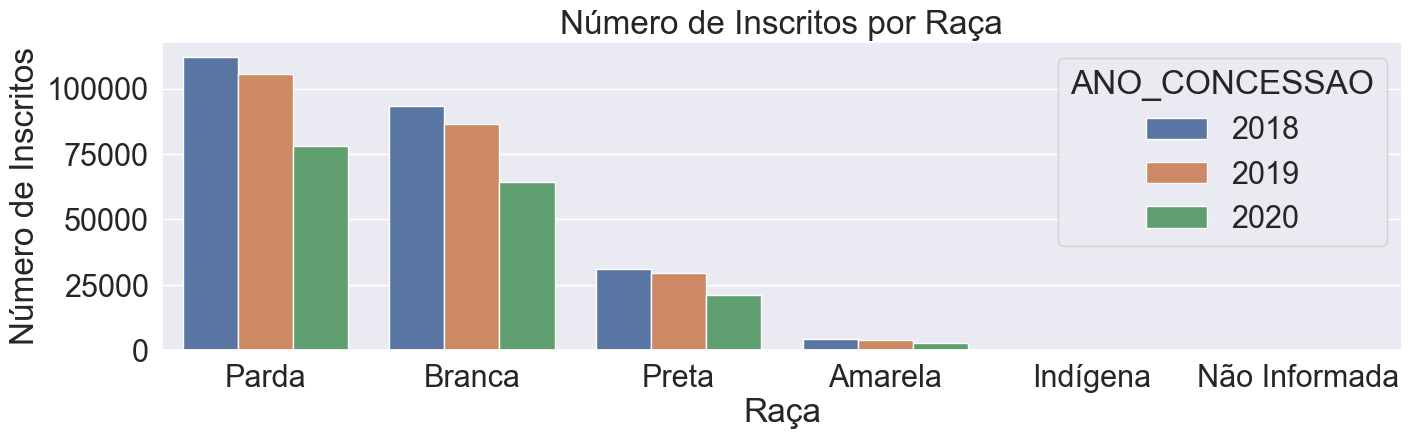

In [32]:
prouni_filtered = prouni[prouni['ANO_CONCESSAO'] != 'Outro']
prouni_filtered['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)
sns.set(font_scale=2)
plt.figure(figsize=(16, 4))
sns.countplot(x='RACA_BENEFICIARIO', hue='ANO_CONCESSAO', data=prouni_filtered, dodge=True)
plt.title("N√∫mero de Inscritos por Ra√ßa")
plt.xlabel('Ra√ßa')
plt.ylabel('N√∫mero de Inscritos')
plt.show()

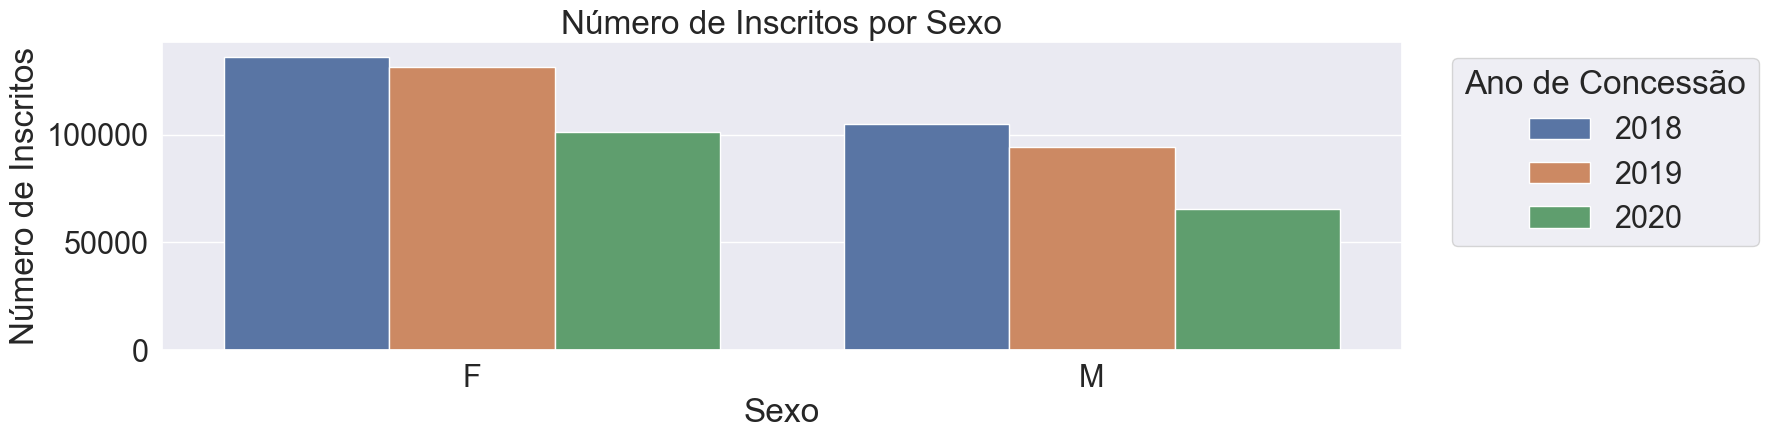

In [33]:
prouni_filtered['ANO_CONCESSAO'] = df_prouni_filtrado['ANO_CONCESSAO'].astype(float).astype(int)
sns.set(font_scale=2)
plt.figure(figsize=(16, 4))
ax = sns.countplot(x='SEXO_BENEFICIARIO', hue='ANO_CONCESSAO', data=prouni_filtered, dodge=True)
plt.title("N√∫mero de Inscritos por Sexo")
plt.xlabel('Sexo')
plt.ylabel('N√∫mero de Inscritos')
ax.legend(title='Ano de Concess√£o', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Com base nas informa√ß√µes a maioria das bolsas oferecidas pelo programa Prouni s√£o bolsas integrais, representando 72,6% de todas as bolsas. Al√©m disso, a maioria das bolsas √© para cursos presenciais, representando 71,8% de todas as bolsas.

Em termos de distribui√ß√£o regional, a regi√£o Sudeste tem o maior n√∫mero de benefici√°rios de bolsas. Isso pode ser devido ao fato de que esta regi√£o tamb√©m tem a maior popula√ß√£o do Brasil.

Em rela√ß√£o √† ra√ßa dos benefici√°rios das bolsas, a maioria √© parda, seguida por brancos e negros. As mulheres tamb√©m representam um n√∫mero maior de benefici√°rias de bolsas em compara√ß√£o aos homens.

Essas observa√ß√µes podem ser devidas a uma variedade de fatores, como condi√ß√µes socioecon√¥micas, oportunidades educacionais e distribui√ß√£o demogr√°fica. Seria necess√°rio realizar uma an√°lise mais aprofundada para determinar as causas subjacentes dessas tend√™ncias. üòä

In [34]:
prouni.head()

index ANO_CONCESSAO                             NOME_IES TIPO_BOLSA  \
0      0        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
1      1        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
2      2        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
3      3        2018.0  UNIVERSIDADE CAT√ìLICA DE PERNAMBUCO   INTEGRAL   
4      4        2018.0        UNIVERSIDADE DE CAXIAS DO SUL   INTEGRAL   

  MODALIDADE_ENSINO                     NOME_CURSO   NOME_TURNO_CURSO  \
0        PRESENCIAL              Letras - Espanhol            Noturno   
1        PRESENCIAL  Letras - Portugu√™s E Espanhol            Noturno   
2        PRESENCIAL                     Psicologia         Vespertino   
3        PRESENCIAL                 Servi√ßo Social            Noturno   
4               EAD                  Administra√ß√£o  Curso a dist√¢ncia   

  SEXO_BENEFICIARIO RACA_BENEFICIARIO DATA_NASCIMENTO  \
0                 F             Parda      15/07/1980   
1                 M            Branca      06/09/2000   
2                 F             Parda      04/11/1998   
3                 F             Parda      29/09/1999   
4                 F            Branca      30/04/2000   

  BENEFICIARIO_DEFICIENTE_FISICO REGIAO_BENEFICIARIO UF_BENEFICIARIO  \
0                              N            NORDESTE              PE   
1                              N            NORDESTE              PE   
2                              N            NORDESTE              PE   
3                              N            NORDESTE              PE   
4                              N                 SUL              RS   

   MUNICIPIO_BENEFICIARIO  
0                  RECIFE  
1                PAULISTA  
2                  RECIFE  
3                  RECIFE  
4  SAO FRANCISCO DE PAULA

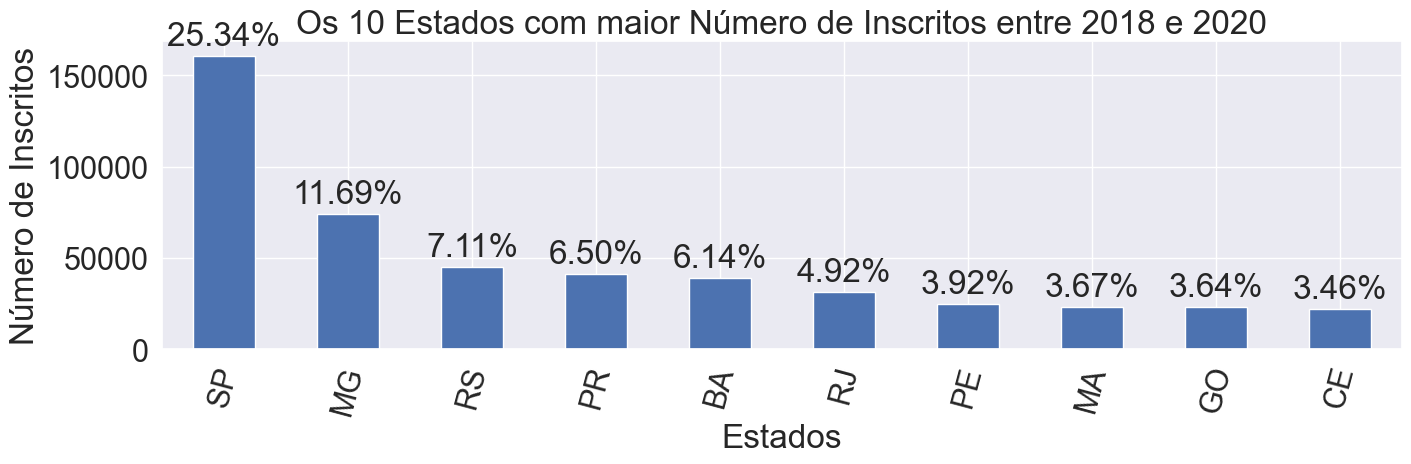

In [35]:
df_prouni_filtrado['UF_BENEFICIARIO'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("Os 10 Estados com maior N√∫mero de Inscritos entre 2018 e 2020")
plt.xlabel("Estados")
plt.ylabel("N√∫mero de Inscritos")
plt.xticks(rotation=75)

# Obt√©m o total de inscritos
total_inscritos = df_prouni_filtrado['UF_BENEFICIARIO'].value_counts().sum()

# Percorre cada barra do gr√°fico
for barra in plt.gca().patches:
    # Obt√©m a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em rela√ß√£o ao total
    porcentagem = altura / total_inscritos * 100

    # Adiciona a porcentagem acima de cada barra
    plt.gca().annotate(f'{porcentagem:.2f}%', 
                       xy=(barra.get_x() + barra.get_width() / 2, altura),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center',
                       va='bottom')

plt.show()

In [36]:
prouni['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts()

BENEFICIARIO_DEFICIENTE_FISICO
N        628933
Outro     15477
S          4484
Name: count, dtype: int64

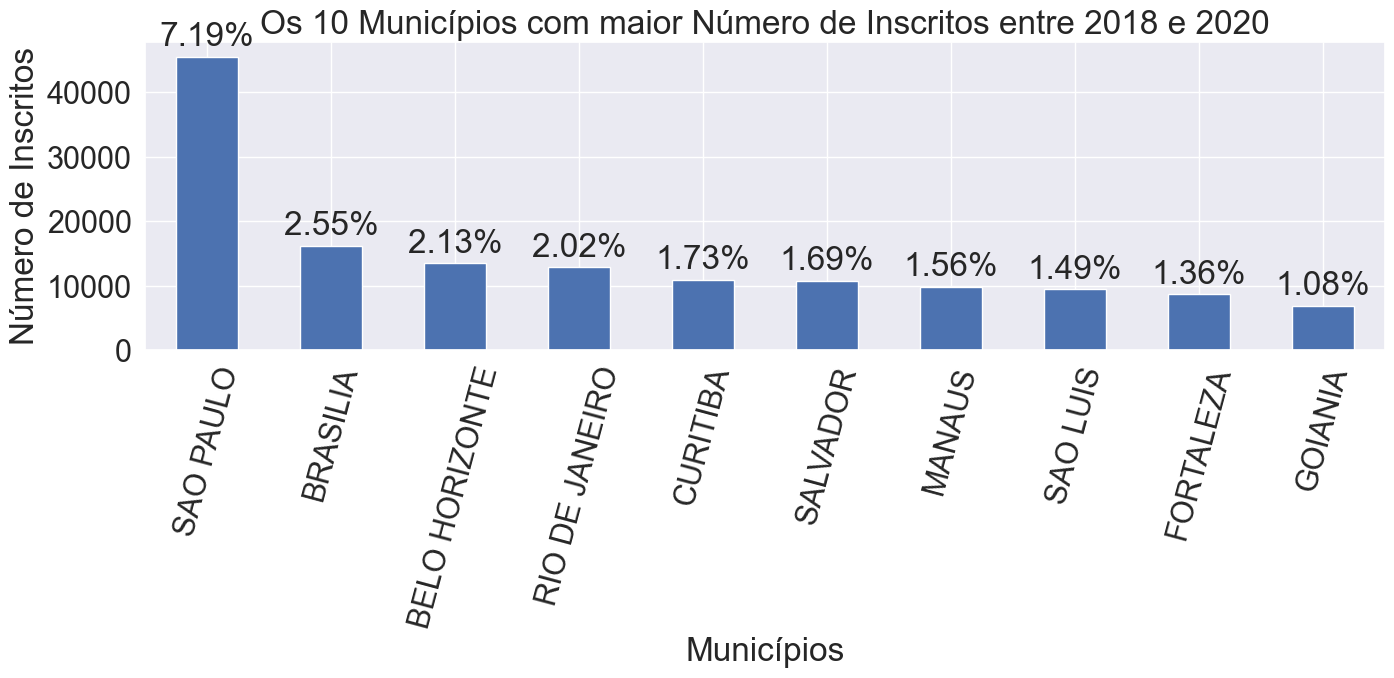

In [37]:
df_prouni_filtrado['MUNICIPIO_BENEFICIARIO'].value_counts().head(10).plot(kind='bar', figsize=(16, 4))
plt.title("Os 10 Munic√≠pios com maior N√∫mero de Inscritos entre 2018 e 2020")
plt.xlabel("Munic√≠pios")
plt.ylabel("N√∫mero de Inscritos")
plt.xticks(rotation=75)

total_inscritos = df_prouni_filtrado['MUNICIPIO_BENEFICIARIO'].value_counts().sum()

for barra in plt.gca().patches:
    # Obt√©m a altura da barra
    altura = barra.get_height()
    # Calcula a porcentagem da barra em rela√ß√£o ao total
    porcentagem = altura / total_inscritos * 100

    plt.gca().annotate(f'{porcentagem:.2f}%', 
                       xy=(barra.get_x() + barra.get_width() / 2, altura),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center',
                       va='bottom')

plt.show()

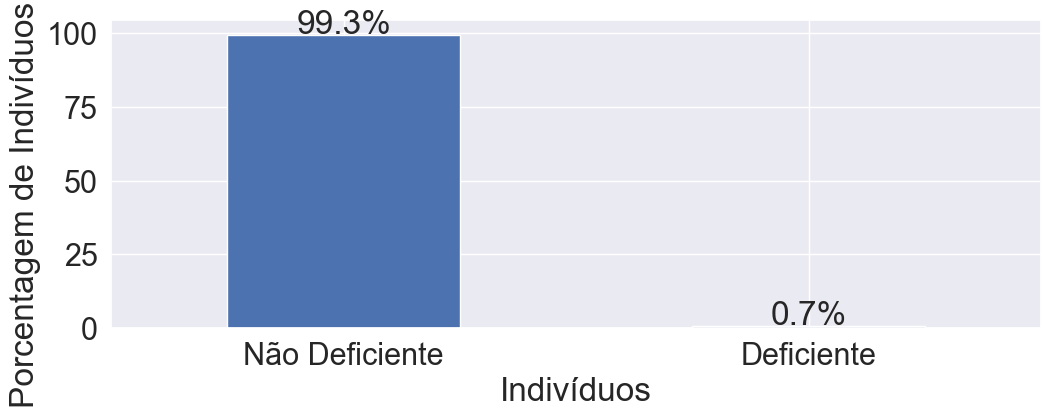

In [38]:
prouni_filtered = prouni[prouni['BENEFICIARIO_DEFICIENTE_FISICO'] != 'Outro']
data = prouni_filtered['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts(normalize=True) * 100
data.index = ['N√£o Deficiente', 'Deficiente']

plt.figure(figsize=(12, 4))
ax = data.plot(kind='bar')
plt.xlabel('Indiv√≠duos')
plt.ylabel('Porcentagem de Indiv√≠duos (%)')
plt.xticks(rotation=0)

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height + 0.5, f'{data[i]:.1f}%', ha='center')

plt.show()

Com base nas informa√ß√µes apenas 0,7% dos benefici√°rios de bolsas s√£o pessoas com defici√™ncia. Isso sugere que pode haver barreiras ao acesso √† educa√ß√£o para pessoas com defici√™ncia.

√â importante promover a inclus√£o e igualdade de oportunidades para pessoas com defici√™ncia em todas as √°reas da sociedade, incluindo a educa√ß√£o. Isso pode ser alcan√ßado atrav√©s de uma variedade de medidas, como fornecer infraestrutura e instala√ß√µes acess√≠veis, oferecer servi√ßos de apoio e acomoda√ß√µes e conscientizar sobre os direitos e necessidades das pessoas com defici√™ncia.

Ao implementar essas medidas, podemos ajudar a garantir que as pessoas com defici√™ncia tenham igualdade de acesso √† educa√ß√£o e √†s oportunidades que ela proporciona. Isso pode beneficiar n√£o apenas as pessoas com defici√™ncia, mas tamb√©m a sociedade como um todo, promovendo diversidade, inclus√£o e justi√ßa social.

Ao analisar os dados referentes ao n√∫mero de inscri√ß√µes no Programa Universidade para Todos (ProUni) nos 10 munic√≠pios com maior quantidade de inscritos entre 2018 e 2020, observa-se que todos eles s√£o capitais. Essa tend√™ncia pode ser justificada por diversos fatores:

1. Concentra√ß√£o populacional: As capitais geralmente apresentam uma densidade populacional maior do que outras cidades. Essa maior concentra√ß√£o de pessoas pode resultar em um n√∫mero maior de estudantes que se enquadram nos crit√©rios de elegibilidade do ProUni, como baixa renda.

2. Maior oferta de institui√ß√µes de ensino superior: As capitais costumam abrigar uma quantidade significativa de institui√ß√µes de ensino superior, incluindo universidades p√∫blicas e privadas. Essa maior oferta de institui√ß√µes educacionais pode atrair um maior n√∫mero de estudantes interessados em se candidatar ao ProUni nessas localidades.

3. Acesso a uma variedade de cursos e √°reas de estudo: As capitais geralmente oferecem uma ampla gama de cursos e √°reas de estudo em suas institui√ß√µes de ensino superior. Isso pode atrair estudantes de diferentes √°reas de interesse que desejam se candidatar ao ProUni em busca de oportunidades educacionais diversificadas.

4. Melhores condi√ß√µes socioecon√¥micas: Em muitos casos, as capitais tendem a apresentar melhores indicadores socioecon√¥micos em compara√ß√£o com outras cidades do pa√≠s. Isso pode refletir em uma maior propor√ß√£o de estudantes eleg√≠veis ao ProUni que atendem aos crit√©rios de baixa renda exigidos pelo programa.

5. Consci√™ncia e divulga√ß√£o: Devido √† maior visibilidade das capitais, pode haver uma conscientiza√ß√£o e divulga√ß√£o mais intensa do ProUni nessas regi√µes. Isso pode resultar em um maior conhecimento do programa entre os estudantes, incentivando um maior n√∫mero de inscri√ß√µes.

√â importante ressaltar que essas s√£o apenas algumas poss√≠veis justificativas para a concentra√ß√£o das inscri√ß√µes do ProUni nas capitais. Outros fatores espec√≠ficos de cada cidade e contexto local tamb√©m podem influenciar essa tend√™ncia.

## Conlus√£o

Ao analisar os dados do Programa Universidade para Todos (ProUni), √© poss√≠vel observar que ainda h√° desafios a serem enfrentados para promover uma educa√ß√£o mais inclusiva no Brasil. Dentre as conclus√µes obtidas a partir dos dados, destaca-se o fato de que pessoas com defici√™ncia representam apenas 0,7% dos inscritos no programa. Essa baixa representatividade pode ser justificada por diversos fatores:

1. Barreiras f√≠sicas e de acessibilidade: Infelizmente, muitas institui√ß√µes de ensino ainda enfrentam desafios em termos de infraestrutura e acessibilidade para pessoas com defici√™ncia. A falta de adapta√ß√µes adequadas nas instala√ß√µes e a aus√™ncia de recursos pedag√≥gicos inclusivos podem dificultar o acesso e a participa√ß√£o desses estudantes no ensino superior.

2. Falta de divulga√ß√£o e conscientiza√ß√£o: A falta de divulga√ß√£o eficiente sobre as oportunidades oferecidas pelo ProUni para pessoas com defici√™ncia pode contribuir para a baixa representatividade desse grupo nos inscritos. A conscientiza√ß√£o insuficiente sobre as pol√≠ticas e recursos dispon√≠veis para apoiar estudantes com defici√™ncia pode resultar em uma menor procura por parte desses indiv√≠duos.

3. Desigualdades socioecon√¥micas: Pessoas com defici√™ncia frequentemente enfrentam desigualdades socioecon√¥micas, o que pode impactar seu acesso √† educa√ß√£o superior. Quest√µes como falta de recursos financeiros para arcar com as despesas complementares das bolsas parciais do ProUni e dificuldades no acesso a servi√ßos de apoio e assist√™ncia podem ser obst√°culos para a participa√ß√£o desses estudantes no programa.

Al√©m disso, √© importante ressaltar que o n√∫mero de inscritos no ProUni vem diminuindo a cada ano. Essa tend√™ncia pode ser justificada por diversos fatores:

1. Condi√ß√µes socioecon√¥micas desfavor√°veis: Oscila√ß√µes na economia do pa√≠s e per√≠odos de recess√£o podem impactar negativamente o n√∫mero de inscritos no programa. A falta de recursos financeiros e a incerteza econ√¥mica podem desencorajar muitos estudantes de baixa renda a se inscreverem no ProUni.

2. Mudan√ßas nas regras e crit√©rios do programa: Altera√ß√µes nas regras e crit√©rios de elegibilidade do ProUni podem influenciar a participa√ß√£o dos estudantes. Se houver redu√ß√£o nos benef√≠cios oferecidos ou restri√ß√µes nos crit√©rios de elegibilidade, isso pode levar a uma diminui√ß√£o no interesse e na inscri√ß√£o no programa.

Quanto √† menor quantidade de inscritos vindos do interior dos estados, pode-se considerar algumas justificativas:

1. Menor oferta de institui√ß√µes de ensino superior: Muitas vezes, o interior dos estados possui uma menor oferta de institui√ß√µes de ensino superior em compara√ß√£o com as regi√µes metropolitanas e capitais. A falta de op√ß√µes pr√≥ximas pode dificultar o acesso e a participa√ß√£o dos estudantes do interior no ProUni.

2. Dificuldades log√≠sticas: A dist√¢ncia e a falta de infraestrutura adequada de transporte podem ser obst√°culos para que estudantes do interior dos estados se candidatem ao ProUni. A dificuldade em se deslocar para participar de processos seletivos ou para acompanhar o desenvolvimento do curso podem influenciar a decis√£o de n√£o se inscreverem.

Essas s√£o algumas poss√≠veis justificativas para a baixa representatividade de pessoas com defici√™ncia, a diminui√ß√£o no n√∫mero de inscritos ao longo dos anos e a menor quantidade de inscritos provenientes do interior dos estados no Programa Universidade para Todos (ProUni). Esses dados destacam a necessidade cont√≠nua de aprimorar as pol√≠ticas educacionais e promover um ambiente mais inclusivo, visando garantir igualdade de oportunidades de acesso √† educa√ß√£o superior para todos os estudantes, independentemente de sua defici√™ncia, localiza√ß√£o geogr√°fica ou condi√ß√µes socioecon√¥micas.